In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url)
df.head()


,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


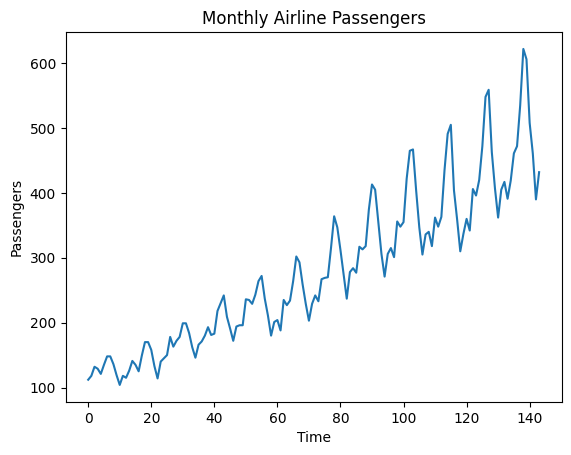

In [2]:
# Plot the data
plt.plot(df['Passengers'])
plt.title('Monthly Airline Passengers')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.show()

In [3]:
# Normalize the dataset
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df[['Passengers']])

# Function to create input/output sequences
def create_sequences(data, step=5):
    X, y = [], []
    for i in range(len(data) - step):
        X.append(data[i:i+step])
        y.append(data[i+step])
    return np.array(X), np.array(y)

seq_length = 5
X, y = create_sequences(data_scaled, seq_length)

# Train/test split
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

In [4]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, verbose=1, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 371ms/step - loss: 0.0992 - val_loss: 0.3510
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0792 - val_loss: 0.3031
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0678 - val_loss: 0.2588
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0583 - val_loss: 0.2175
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0451 - val_loss: 0.1796
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0349 - val_loss: 0.1446
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0300 - val_loss: 0.1118
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0190 - val_loss: 0.0824
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0156 - val_loss: 0.0586
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0162 - val_loss: 0.0418
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0118 - val_loss: 0.0334
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0114 - val_loss: 0.0294


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step

Training Set Metrics:
MAE   : 28.74
RMSE  : 38.08
MAPE  : 11.67%
sMAPE : 11.33%

Test Set Metrics:
MAE   : 60.26
RMSE  : 72.54
MAPE  : 13.52%
sMAPE : 13.47%


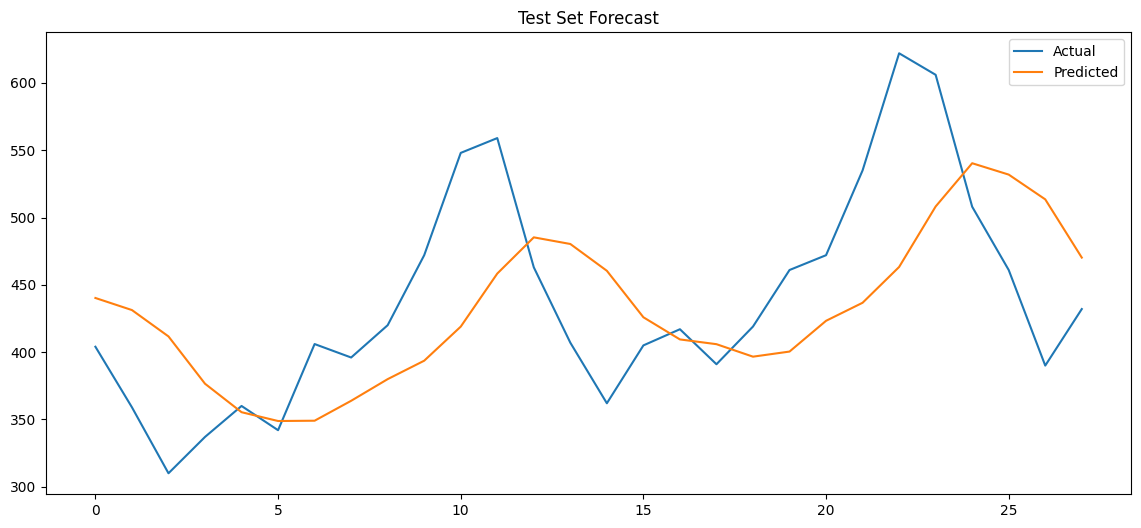

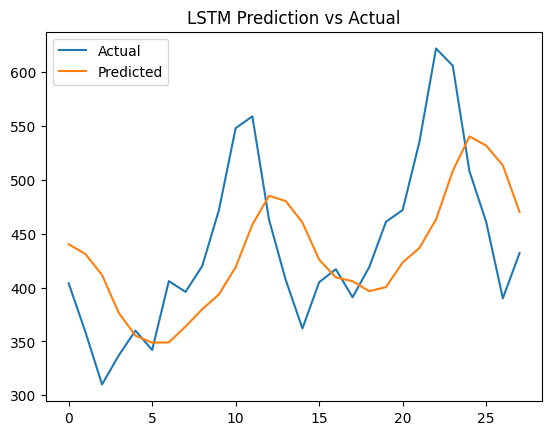

Test RMSE: 72.54


In [8]:
# Predict and inverse scale
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Evaluate
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse transform predictions
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_train_pred_actual = scaler.inverse_transform(y_train_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_pred_actual = scaler.inverse_transform(y_test_pred)

# Metrics
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    smape = 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))
    return mae, rmse, mape, smape

mae_tr, rmse_tr, mape_tr, smape_tr = evaluate(y_train_actual, y_train_pred_actual)
mae_te, rmse_te, mape_te, smape_te = evaluate(y_test_actual, y_test_pred_actual)

print("\nTraining Set Metrics:")
print(f"MAE   : {mae_tr:.2f}")
print(f"RMSE  : {rmse_tr:.2f}")
print(f"MAPE  : {mape_tr:.2f}%")
print(f"sMAPE : {smape_tr:.2f}%")

print("\nTest Set Metrics:")
print(f"MAE   : {mae_te:.2f}")
print(f"RMSE  : {rmse_te:.2f}")
print(f"MAPE  : {mape_te:.2f}%")
print(f"sMAPE : {smape_te:.2f}%")

# Plot results
plt.figure(figsize=(14,6))
plt.plot(y_test_actual, label='Actual')
plt.plot(y_test_pred_actual, label='Predicted')
plt.title('Test Set Forecast')
plt.legend()
plt.show()

# Plot actual vs predicted
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.legend()
plt.title('LSTM Prediction vs Actual')
plt.show()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f"Test RMSE: {rmse:.2f}")
